# Wheat Seeds 3
## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Draw Decision Regions Function

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

# Data Preprocessing
## Download the Wheat Seed dataset from the given link

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'

--2023-02-20 22:46:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-20 22:46:11 (62.5 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]



## Read Wheat Seed Data with all features and target values

In [4]:
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            'Length of kernel groove.']

df = pd.read_csv(path, delimiter=r'[\t]+',
                 names=features + ['target'])
display(df)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## Split the train and test values and normalize them

In [5]:
X = df.loc[:, features]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler()

X_train_std = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test_std = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [49 49 49]
Labels counts in y_test: [21 21 21]


In [6]:
X_train_std

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.
0,1.429874,1.539473,-0.039376,1.815992,0.814170,-1.104344,2.083243
1,-0.238149,-0.342445,0.894076,-0.470615,0.149722,-0.707340,-0.827726
2,0.707178,0.838516,-0.201896,1.127121,0.577627,0.003841,1.109581
3,1.419598,1.425186,0.552366,1.369337,1.353702,-0.230363,1.472200
4,2.080643,1.905190,1.394140,1.818214,2.089910,0.946370,1.818791
...,...,...,...,...,...,...,...
142,-1.186901,-1.279594,-0.418591,-1.286149,-1.054257,-0.245358,-0.821715
143,-1.443784,-1.630073,-0.201896,-1.628363,-1.219040,0.917094,-1.240430
144,-0.238149,-0.281492,0.514861,-0.201733,-0.065559,-0.668782,-0.751596
145,0.039284,-0.091015,1.289960,-0.550613,0.442079,-1.819809,-0.651425


In [7]:
X_test_std

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.
0,0.272190,0.427084,-0.485266,0.444917,0.107198,-0.689489,0.678846
1,-0.810141,-0.731019,-0.976995,-0.695054,-0.926683,0.880679,-0.286802
2,1.631955,1.668998,0.344006,1.671551,1.398884,-1.584177,1.722627
3,-0.933444,-1.005307,-0.135221,-1.183930,-0.823030,-1.624877,-0.905859
4,1.416173,1.348995,1.023259,1.138232,1.539747,-0.558820,1.073519
...,...,...,...,...,...,...,...
58,-0.895768,-1.028164,0.360675,-1.099487,-0.703429,-0.042571,-1.088170
59,-0.693687,-0.746257,0.081473,-0.821717,-0.583828,-1.795532,-1.264471
60,-1.361582,-1.211022,-2.489687,-0.786162,-1.607078,1.064900,-0.457093
61,-0.656011,-0.593875,-0.647786,-0.303953,-0.583828,1.781079,-0.194645


# PCA
### Calculate the covariance matrix and eigen values and eigen vectors

In [8]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [4.98127661e+00 1.29867983e+00 6.71183896e-01 7.16986274e-02
 1.90146349e-02 8.36794608e-04 5.25481284e-03]


### Draw explained Variance and it cumulative value to see the variance of the features.

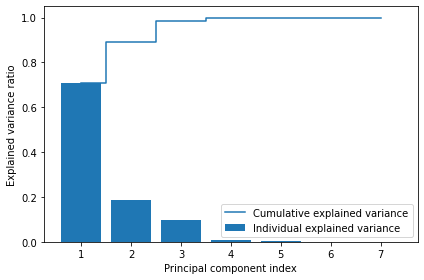

In [9]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(features) + 1), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, len(features) + 1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('figures/05_02.png', dpi=300)
plt.show()

### Using scikit learn PCA and Logistic Regression tools


In [10]:
pca = PCA(n_components=len(features))
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca[:, [0, 1]], y_train)


## Plot 3 top principle componants in a 3D scetch 


### On the train data

Text(0.5, 0, 'PC2 2')

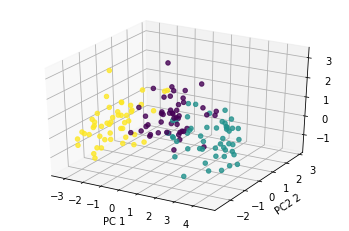

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], alpha=0.8,
            c=y_train)
plt.xlabel('PC 1')
plt.ylabel('PC2 2')

### On the test data

Text(0.5, 0, 'PC2 2')

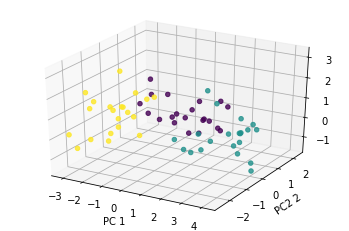

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], alpha=0.8,
            c=y_test)
plt.xlabel('PC 1')
plt.ylabel('PC2 2')

## Plot 2 top principle componants with decision boundaries using logistic regression


### On the train data

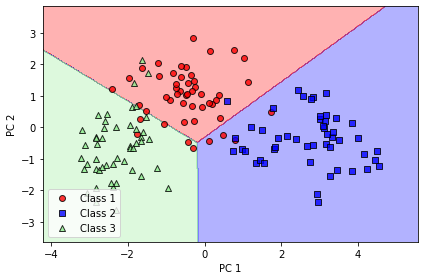

In [ ]:
plot_decision_regions(X_train_pca[:, [0, 1]], y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()

### On the test data

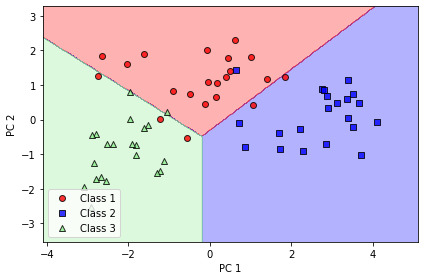

In [ ]:
plot_decision_regions(X_test_pca[:, [0, 1]], y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_04.png', dpi=300)
plt.show()

## See the effect of each feature 
### on the first principle component

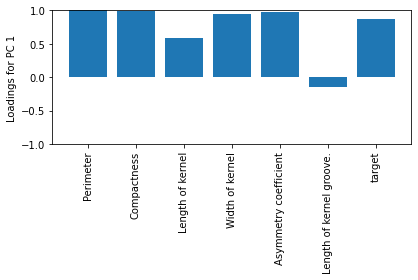

In [15]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(len(features)), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(len(features)))
ax.set_xticklabels(df.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### on the second principle component

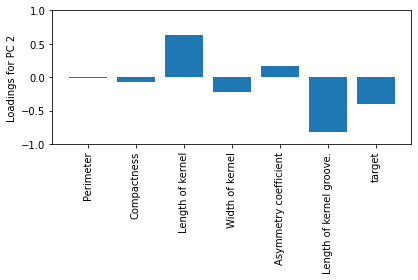

In [16]:
fig, ax = plt.subplots()

ax.bar(range(len(features)), loadings[:, 1], align='center')
ax.set_ylabel('Loadings for PC 2')
ax.set_xticks(range(len(features)))
ax.set_xticklabels(df.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

### On the third principle component

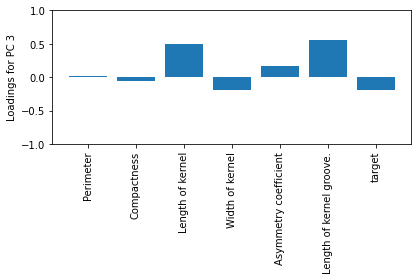

In [17]:
fig, ax = plt.subplots()

ax.bar(range(len(features)), loadings[:, 2], align='center')
ax.set_ylabel('Loadings for PC 3')
ax.set_xticks(range(len(features)))
ax.set_xticklabels(df.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

# LDA
## Plot Linear Discriminant Analysis with decision boundaries using logistic regression


### On the train data

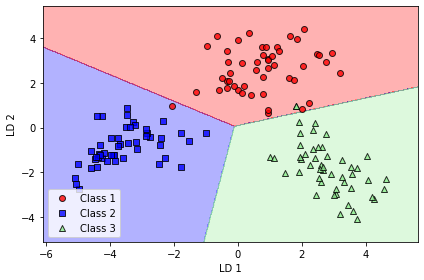

In [18]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()

### On the test data

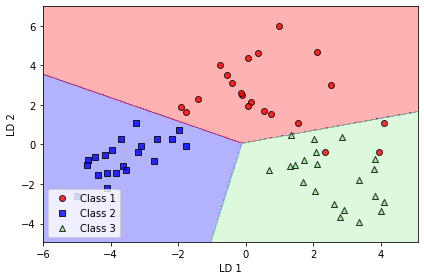

In [19]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_09.png', dpi=300)
plt.show()

# Which one do I choose? Why?

## In this case: LDA

The answer to the above question cannot always stay identical. The reason is that each of these methods has its own application and can be useful in distinct scenarios. So first of all, let us refer to the book explanation to see how these two methods are compared: 

LDA is a linear transformation method that makes use of class label data. In non-regularized models. It may be employed as a feature extraction approach to improve computational efficiency and lessen the degree of overfitting brought on by the curse of dimensionality.
Similar in idea to PCA, LDA seeks to identify the feature subspace that maximizes class separability rather than PCA's objective of identifying the orthogonal component axes of highest variance in a dataset. 

While LDA is a supervised method and PCA is an unsupervised approach, both may be used to minimize the number of dimensions in a dataset.
As a result, we can believe that LDA is preferable to PCA as a feature extraction method for classification problems.

Considering the given explanation, there are some reasons why we would choose LDA over PCA in this assignment:

1. LDA is supervised and good for classification as we can get better results by feeding it the labels of the classes.
2. LDA uses classes to reduce the dimensionality. However, PCA uses number of features. In this assignment, there are 7 distinct features compared to only 3 different classes. To apply PCA, there are 7 principle components available that each has valuable data within. Therefore, having a mapping from 3 classes to 2 dimensions, seems to be more realistic that mapping from 7 features to only 2 dimensions. 
3. Also the visual results from the decision boundaries in this assignment prove that LDA results are more reliable than PCA results.
